## Library

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import set_matplotlib_hangul
import plotly.express as px

Hangul OK in your MAC!


In [2]:
# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-cosmetics-shop")
print(os.listdir(path)) # 다운로드된 파일 목록 확인

['2020-Jan.csv', '2019-Dec.csv', '2020-Feb.csv', '2019-Nov.csv', '2019-Oct.csv']


In [ ]:
files = ["2020-Jan.csv", "2019-Dec.csv", "2020-Feb.csv", "2019-Nov.csv", "2019-Oct.csv"]

dfs = {}
min_rows = float('inf')  # 최소 row 수를 저장할 변수
min_df = None  # 가장 작은 데이터프레임을 저장할 변수

for file in files:
    file_path = os.path.join(path, file)  # 파일 경로 생성
    df = pd.read_csv(file_path)  # CSV 파일 로드
    dfs[file] = df  # 딕셔너리에 저장
    
    print(f"{file}: {df.shape}")  
    
    # row 수가 가장 적은 데이터프레임 찾기
    if df.shape[0] < min_rows:
        min_rows = df.shape[0]
        min_df = df

# 가장 row 수가 적은 데이터프레임을 df에 저장
df = min_df
df

2020-Jan.csv: (4264752, 9)
2019-Dec.csv: (3533286, 9)
2020-Feb.csv: (4156682, 9)
2019-Nov.csv: (4635837, 9)
2019-Oct.csv: (4102283, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

# df.to_csv("Funnel.csv") # 저장
df = pd.read_csv("../data/Funnel.csv", index_col=0) # Load Data
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


In [3]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 269.6+ MB


### Step 1: 데이터 전처리

> 본격적인 퍼널 분석을 수행하기 전에 적합한 형태로 변환하는 과정이다.<br>
> 현재 **event_time** 변수를 보면 **object** 타입으로 구성돼 있지만, 시간을 나타내는 변수이기 때문에 **to_datetime** 함수를 사용해서 데이터 타입을 변경해 주겠다.

In [4]:
# 결측치 확인
df.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64

In [3]:
# 결측치 컬럼 제거
df.drop(columns={'category_code', 'brand', 'user_session'}, inplace=True)
df.head()

,event_time,event_type,product_id,category_id,price,user_id
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,6.27,576802932
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,29.05,412120092
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,1.19,494077766
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,0.79,348405118
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,5.56,576005683


In [4]:
df['event_time'] = pd.to_datetime(df['event_time']) # 시게열 타입으로 변환
df['Date'] = df['event_time'].dt.date # 일자별 컬러 생성
df['Date'] = pd.to_datetime(df['Date'])
df

,event_time,event_type,product_id,category_id,price,user_id,Date
0,2019-12-01 00:00:00+00:00,remove_from_cart,5712790,1487580005268456287,6.27,576802932,2019-12-01
1,2019-12-01 00:00:00+00:00,view,5764655,1487580005411062629,29.05,412120092,2019-12-01
2,2019-12-01 00:00:02+00:00,cart,4958,1487580009471148064,1.19,494077766,2019-12-01
3,2019-12-01 00:00:05+00:00,view,5848413,1487580007675986893,0.79,348405118,2019-12-01
4,2019-12-01 00:00:07+00:00,view,5824148,1487580005511725929,5.56,576005683,2019-12-01
...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39+00:00,view,5683350,1487580005671109489,2.84,536812729,2019-12-31
3533282,2019-12-31 23:59:46+00:00,view,5888097,1487580013388628160,179.05,503658154,2019-12-31
3533283,2019-12-31 23:59:51+00:00,view,59975,1487580012096782476,7.14,595414541,2019-12-31
3533284,2019-12-31 23:59:52+00:00,view,5775982,1783999063314661546,11.90,397780878,2019-12-31


### Step 2: 사용자 이벤트 분석

> 전처리를 완료했으니, 이제 사용자들이 어떤 이벤트를 얼마나 수행했는지 분석해보자.<br>
> 퍼널 분석에서는 각 단계별로 몇 명의 사용자가 남아 있는지, 그리고 어디에서 이탈하는지를 파악하는 것이 핵심이다.<br>
> 각 퍼널 단계별 DAU( Daily Active Users) 추출

----------------------

#### **DAU란**?

> **DAU**(Daily Active Users) 일간 활성 사용자 수 는 하루 동안 최소 1회 이상 특정 이벤트(view, cart, purchase 등)를 수행한 고유 사용자 수를 의미한다.<br>
> 이는 사용자의 서비스 참여도를 측정하는 핵심 지표이며, 일별 사용자 활동량과 서비스 성장성을 평가하는 데 활용된다.


In [5]:
# 시각화 함수
class Funnel_Analysis:

    # bar_plot 함수
    @staticmethod    
    def bar_plot(df, x_col, y_col, figsize=(10, 6), palette="Blues_r", rotation=None, title=None, xlabel=None, ylabel=None):
        plt.figure(figsize=figsize)
        sns.barplot(x=df[x_col], y=df[y_col], data=df, palette=palette)
        plt.xticks(rotation=rotation)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    # box_plot 함수
    @staticmethod
    def box_plot(df, x_col, y_col, figsize=(8, 6), palette=None, title=None, xlabel=None, ylabel=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=df, x=x_col, y=y_col, palette=palette)
        plt.xticks(rotation=90)
        plt.title(title, fontsize=14)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()

    # line_plot 함수
    @staticmethod
    def plot_lineplot(df, x_col, y_col, hue=None, figsize=(10, 6), palette=None, marker='o', linewidth=2, rotation=None, title=None, xlabel=None, ylabel=None):
        plt.figure(figsize=figsize)
        
        # hue가 None이면 일반 lineplot, hue가 있으면 그룹별 lineplot
        sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette, marker=marker, linewidth=linewidth)
        plt.xticks(rotation=rotation)  
        plt.title(title if title else f'{y_col} by {x_col} (Line Plot)')  
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        if hue: # hue가 있을 경우 범례 추가
            plt.legend(title=hue)
        plt.show()

- 이벤트 타입별 사용자 수

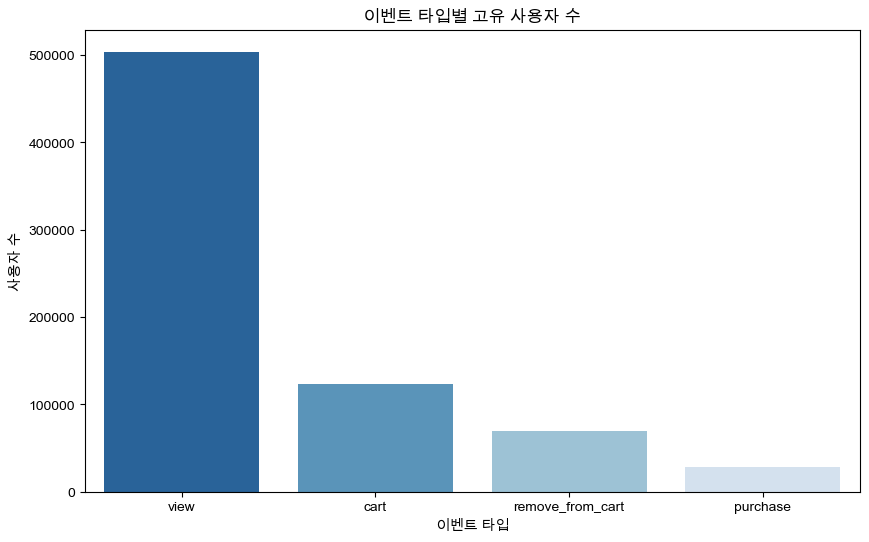

In [6]:
# 각 사용자별 'event_type' 일수 계산
funnel_df = df.groupby(['user_id', 'event_type'])['Date'].nunique().unstack().fillna(0)
event_counts = funnel_df.sum().sort_values(ascending=False).reset_index() # 이벤트 별 사용자 수
event_counts.columns = ['event_type', 'unique_users']

# 시각화 함수
Funnel_Analysis.bar_plot(df=event_counts, x_col='event_type', y_col='unique_users', xlabel='이벤트 타입', ylabel='사용자 수', title='이벤트 타입별 고유 사용자 수')

- 전체 DAU 분석

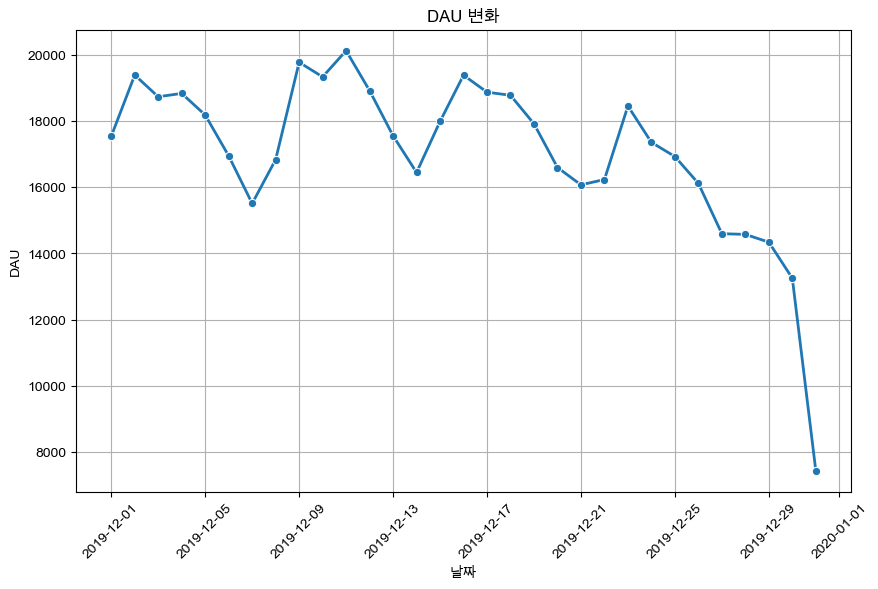

In [7]:
dau = df.groupby('Date')['user_id'].nunique().reset_index().rename({'user_id': 'DAU'}, axis = 1)
Funnel_Analysis.plot_lineplot(df=dau, x_col='Date', y_col='DAU', title='DAU 변화', xlabel='날짜', ylabel='DAU', rotation=45)

- 요일별 DAU 변화 분석

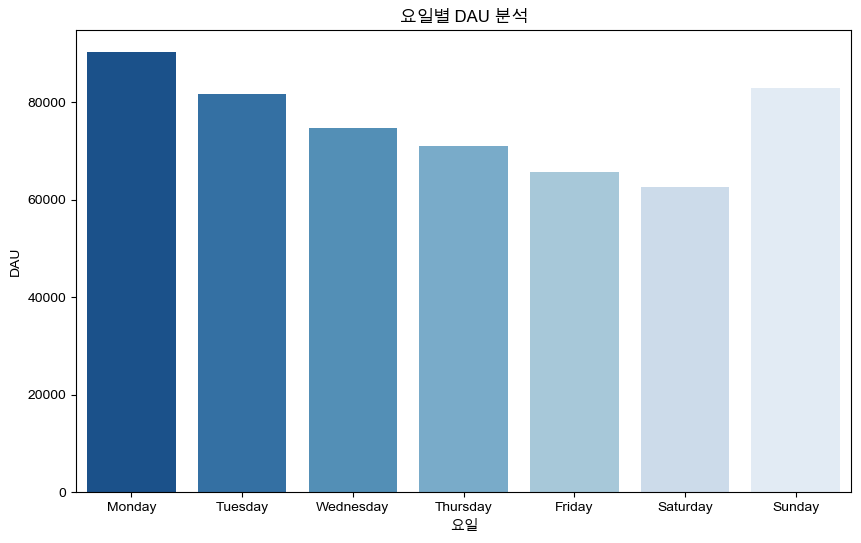

In [8]:
# 요일 컬럼 추가 (숫자+이름)
dau['day_of_week'] = dau['Date'].dt.day_of_week  # 0=Monday, 6=Sunday
dau['Week'] = dau['Date'].dt.day_name()
week_dau = dau.groupby(['day_of_week', 'Week'])['DAU'].sum().reset_index()
week_dau = week_dau.sort_values('day_of_week')

# 시각화
Funnel_Analysis.bar_plot(df=week_dau, x_col='Week', y_col='DAU', title='요일별 DAU 분석', xlabel='요일', ylabel='DAU')

- 이벤트별 DAU 변화 분석

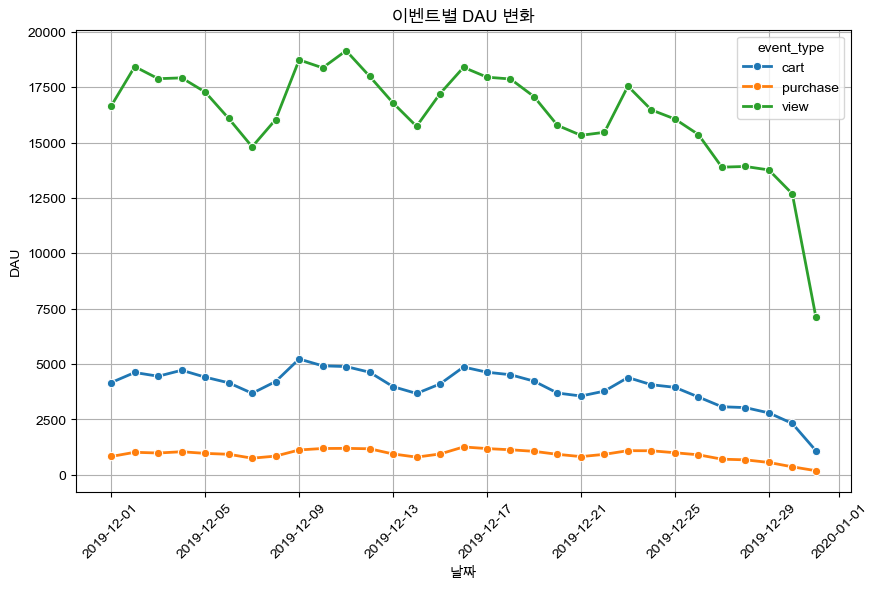

In [9]:
# 이벤트별 DAU 계산 (일별 이벤트 수행 사용자 수)
event_dau_df = df.groupby(['Date', 'event_type'])['user_id'].nunique().unstack().fillna(0)
event_dau_melted = event_dau_df.reset_index().melt(id_vars=['Date'], var_name='event_type', value_name='DAU')
event_dau_melted = event_dau_melted[event_dau_melted['event_type'] != 'remove_from_cart'] # '장바구니 삭제'는 퍼널에서 제외

# 이벤트별 DAU 변화 시각화
Funnel_Analysis.plot_lineplot(df=event_dau_melted, x_col='Date', y_col='DAU', hue='event_type', title='이벤트별 DAU 변화', xlabel='날짜', ylabel='DAU', rotation=45)

- 이번엔 요일별 DAU 분석

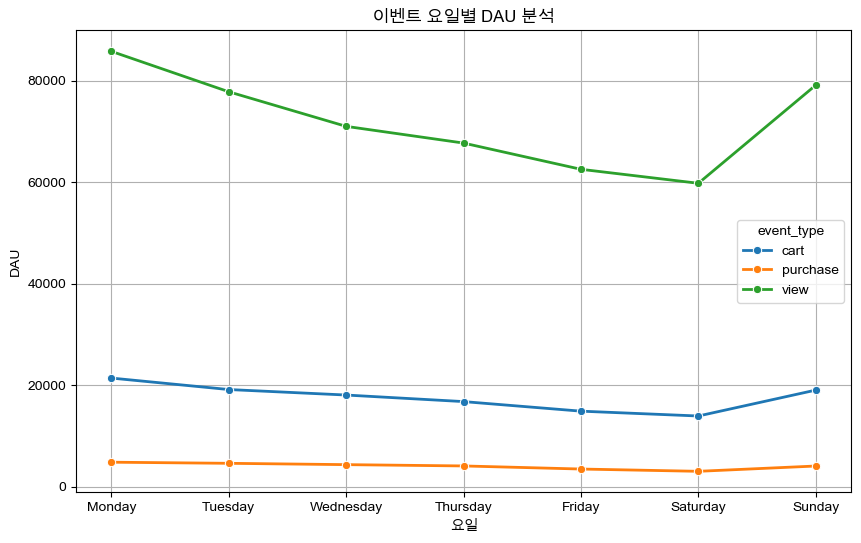

In [10]:
event_dau_melted['day_of_week'] = event_dau_melted['Date'].dt.day_of_week # 0=Monday, 6=Sunday
event_dau_melted['Week'] = event_dau_melted['Date'].dt.day_name()
event_week_dau = event_dau_melted.groupby(['day_of_week', 'Week', 'event_type'])['DAU'].sum().reset_index()
event_week_dau = event_week_dau[event_week_dau['event_type'] != 'remove_from_cart']
event_week_dau = event_week_dau.sort_values('day_of_week')

# 시각화
Funnel_Analysis.plot_lineplot(df=event_week_dau, x_col='Week', y_col='DAU', hue='event_type', title='이벤트 요일별 DAU 분석', xlabel='요일', ylabel='DAU')

### Step 3: 체류 시간 분석

> 이번엔 사이트 체류 시간에 대해 알아보려 한다.<br>
> 사용자의 사이트 체류 시간은 서비스의 사용자 경험(UX) 및 이탈률을 평가하는 중요한 지표이다.<br>
> 체류 시간이 길수록 관심이 높고, 짧을수록 개선이 필요할 가능성이 있다.<br>
> 또한, 퍼널 분석의 주목적은 구매까지의 전환율을 분석하는 것이기에, remove_from_cart(장바구니 삭제)는 제외

In [11]:
df = df.sort_values(by=['user_id', 'event_time'])
df['prev_time'] = df.groupby('user_id')['event_time'].shift(1) # # 이전 이벤트 시간 계산
df['time_diff'] = (df['event_time'] - df['prev_time']).dt.total_seconds() # 초 단위 변환
df['new_session'] = df['time_diff'].apply(lambda x: 1 if x > 1800 else 0) # 30분(1800초) 이상이면 새로운 세션 시작
df['session_id'] = df.groupby('user_id')['new_session'].cumsum() # 세션 번호 증가

# 유저별 이벤트 세션 체류 시간 계산
user_event_session_time = df.groupby(['user_id', 'event_type', 'session_id'])['time_diff'].sum().reset_index()
user_avg_event_time = user_event_session_time.groupby(['user_id', 'event_type'])['time_diff'].mean().reset_index() # 유저별 평균 체류 시간
event_avg_session_time = user_avg_event_time.groupby('event_type')['time_diff'].mean().reset_index() # 이벤트별 평균 체류 시간 계산
event_avg_session_time['hours'] = (event_avg_session_time['time_diff'] // 3600).astype(int)  # 정수 시간
event_avg_session_time['minutes'] = ((event_avg_session_time['time_diff'] % 3600) / 60).round(0).astype(int)  # 남은 초를 분으로 변환

event_order = ['view', 'cart', 'purchase'] # 정렬
event_avg_session_time = event_avg_session_time.set_index('event_type').loc[event_order].reset_index()
event_avg_session_time

,event_type,time_diff,hours,minutes
0,view,40962.361261,11,23
1,cart,34120.266202,9,29
2,purchase,5526.142084,1,32


In [ ]:
# 추가 전처리
event_avg_session_time['formatted_time'] = event_avg_session_time.apply(
    lambda x: f"{x['hours']}시간 {x['minutes']}분", axis=1)

event_avg_session_time

,event_type,time_diff,hours,minutes,formatted_time
0,view,40962.361261,11,23,11시간 23분
1,cart,34120.266202,9,29,9시간 29분
2,purchase,5526.142084,1,32,1시간 32분


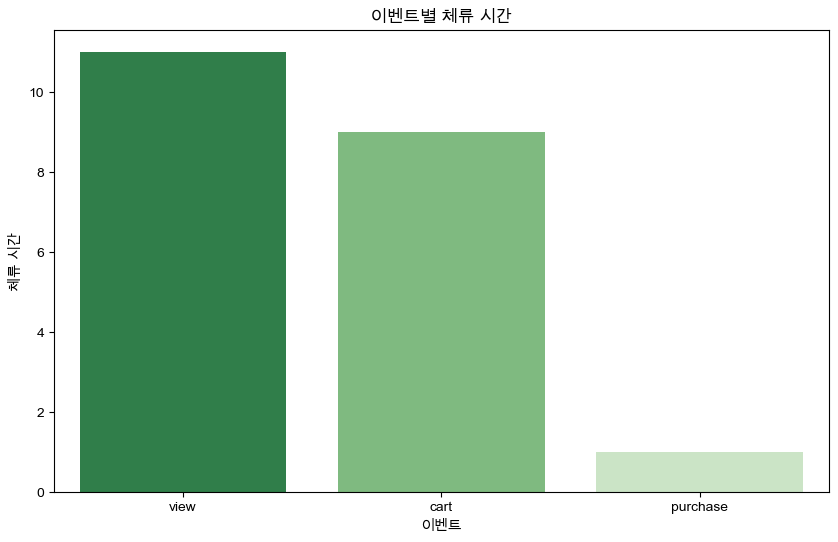

In [13]:
Funnel_Analysis.bar_plot(
    df=event_avg_session_time, x_col='event_type', y_col='hours', 
    title='이벤트별 체류 시간', xlabel='이벤트', ylabel='체류 시간', palette='Greens_r')

### Step 4: 단계별 전환율 분석

> 이번엔 사용자가 구매 퍼널에서 어느 단계에서 가장 많이 이탈하는지 확인하기 위해 전환율과 이탈율을 분석 해보려한다.<br>
> 전환율: 이전 단계 대비 다음 단계로 넘어간 사용자 비율<br>
> 이탈율: 해당 단계에서 빠져나간 사용자 비율

In [ ]:
# event_order = ['view', 'cart', 'purchase'] 

# 퍼널 단계별 사용자 수 계산
funnel_counts = {event: df[df['event_type'] == event]['user_id'].nunique() for event in event_order}

# 전환율 및 이탈율 계산
conversion_rates = {'view': 100}  # View 단계는 전체 사용자의 기준이므로 100% 설정
drop_off_rates = {}

for i in range(len(event_order) - 1):
    current_step = event_order[i]
    next_step = event_order[i + 1]
    
    if funnel_counts[current_step] > 0:
        conversion_rates[next_step] = (funnel_counts[next_step] / funnel_counts[current_step]) * 100  
        drop_off_rates[current_step] = 100 - conversion_rates[next_step]  
    else:
        conversion_rates[next_step] = 0
        drop_off_rates[current_step] = 0

# 마지막 단계(Purchase)의 이탈율은 항상 0%
drop_off_rates[event_order[-1]] = 0  

# 데이터프레임 생성
df_funnel = pd.DataFrame({
    '단계': list(conversion_rates.keys()),
    '전환율 (%)': list(conversion_rates.values()),
    '이탈율 (%)': list(drop_off_rates.values())})

df_funnel

,단계,전환율 (%),이탈율 (%)
0,view,100.000000,76.701506
1,cart,23.298494,69.310312
2,purchase,30.689688,0.000000


- 단계별 전환율 분석

In [ ]:
fig = px.funnel(data_frame=df_funnel, x='단계', y='전환율 (%)', title="단계별 전환율 분석")
fig.update_layout(width=800, height=500)
fig.update_traces(texttemplate='%{value:.2f}%') # 소수점 두 자리
fig.show()

- 단계별 이탈율 분석

In [25]:
fig = px.funnel(data_frame=df_funnel, x='단계', y='이탈율 (%)', title="단계별 이탈율 분석")
fig.update_traces(marker=dict(color='red'))  
fig.update_layout(width=800, height=500)
fig.update_traces(texttemplate='%{value:.2f}%') # 소수점 두 자리
fig.show()